In [19]:
from process_image import *
from model_nn import *

In [ ]:
input_directory = "../Dataset/Foto_Resize_Rotate_70x70" 
X_train, y_train, X_test, y_test, X_val, y_val, scalerinput = process_all(input_directory)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

Found folders: ['Azmira', 'David', 'Dimas', 'Fadhli', 'Fadlin', 'Hafidz', 'Haidar', 'Hanna', 'Keiko', 'Khansa', 'Mikhael', 'Puti', 'Raesa', 'Satwika', 'Toni']
(968, 900) (968, 15) (208, 900) (208, 15) (208, 900) (208, 15)


In [21]:
model_50 = FaceRecognitionModel(X_train.shape[1], [64], y_train.shape[1])

In [22]:
error_train, error_val = model_50.train(X_train, y_train, X_val, y_val, epochs=20000, learning_rate=1e-3, optimizer='sgd', generate_new_params=True)

Params rewritten
Epoch 0, Training Loss: 3.189e+00, Validation Loss: 3.093e+00, Patience: 0, Learning Rate: 0.001
Epoch 1, Training Loss: 3.157e+00, Validation Loss: 3.067e+00, Patience: 0, Learning Rate: 0.001
Epoch 2, Training Loss: 3.126e+00, Validation Loss: 3.044e+00, Patience: 0, Learning Rate: 0.001
Epoch 3, Training Loss: 3.098e+00, Validation Loss: 3.022e+00, Patience: 0, Learning Rate: 0.001
Epoch 4, Training Loss: 3.071e+00, Validation Loss: 3.002e+00, Patience: 0, Learning Rate: 0.001
Epoch 5, Training Loss: 3.047e+00, Validation Loss: 2.983e+00, Patience: 0, Learning Rate: 0.001
Epoch 6, Training Loss: 3.024e+00, Validation Loss: 2.966e+00, Patience: 0, Learning Rate: 0.001
Epoch 7, Training Loss: 3.003e+00, Validation Loss: 2.950e+00, Patience: 0, Learning Rate: 0.001
Epoch 8, Training Loss: 2.983e+00, Validation Loss: 2.935e+00, Patience: 0, Learning Rate: 0.001
Epoch 9, Training Loss: 2.965e+00, Validation Loss: 2.921e+00, Patience: 0, Learning Rate: 0.001
Epoch 10, Tra

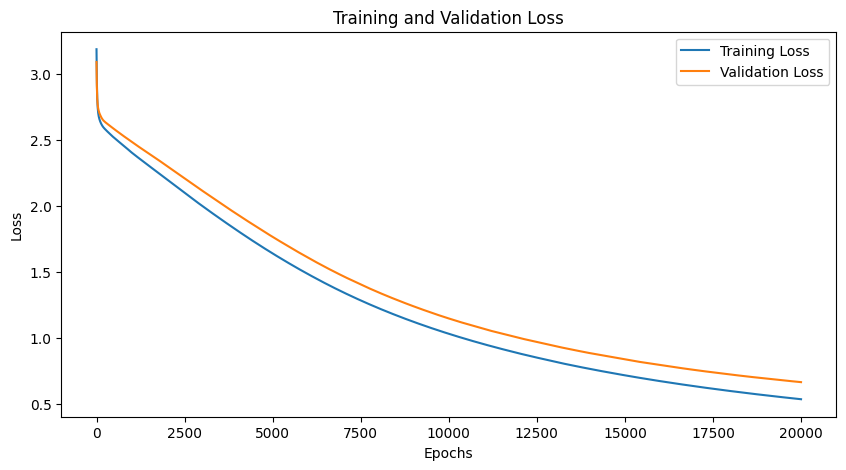

In [23]:
model_50.plot_training_error(error_train, error_val)

In [24]:
y_pred = model_50.test(X_test, y_test)
print(X_test.shape, y_test.shape, y_pred.shape)

Test Error : 0.6940664417810822
(208, 900) (208, 15) (208, 15)


In [25]:
model_50.add_labels_from_folders(input_directory)
model_50.evaluate_metrics(X_test, y_test)

Accuracy: 0.8509615384615384
Azmira - Precision: 0.8461538461538461, Recall: 1.0, F1 Score: 0.9166666666666666
David - Precision: 0.6, Recall: 1.0, F1 Score: 0.7499999999999999
Dimas - Precision: 0.8125, Recall: 0.9285714285714286, F1 Score: 0.8666666666666666
Fadhli - Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Fadlin - Precision: 0.8095238095238095, Recall: 1.0, F1 Score: 0.8947368421052632
Hafidz - Precision: 0.8333333333333334, Recall: 0.7142857142857143, F1 Score: 0.7692307692307692
Haidar - Precision: 0.8181818181818182, Recall: 0.75, F1 Score: 0.7826086956521738
Hanna - Precision: 0.5625, Recall: 0.9, F1 Score: 0.6923076923076923
Keiko - Precision: 0.9130434782608695, Recall: 1.0, F1 Score: 0.9545454545454545
Khansa - Precision: 1.0, Recall: 0.42857142857142855, F1 Score: 0.6
Mikhael - Precision: 1.0, Recall: 1.0, F1 Score: 1.0
Puti - Precision: 0.8571428571428571, Recall: 0.6666666666666666, F1 Score: 0.75
Raesa - Precision: 0.8333333333333334, Recall: 0.4166666666666667, F1 Sco

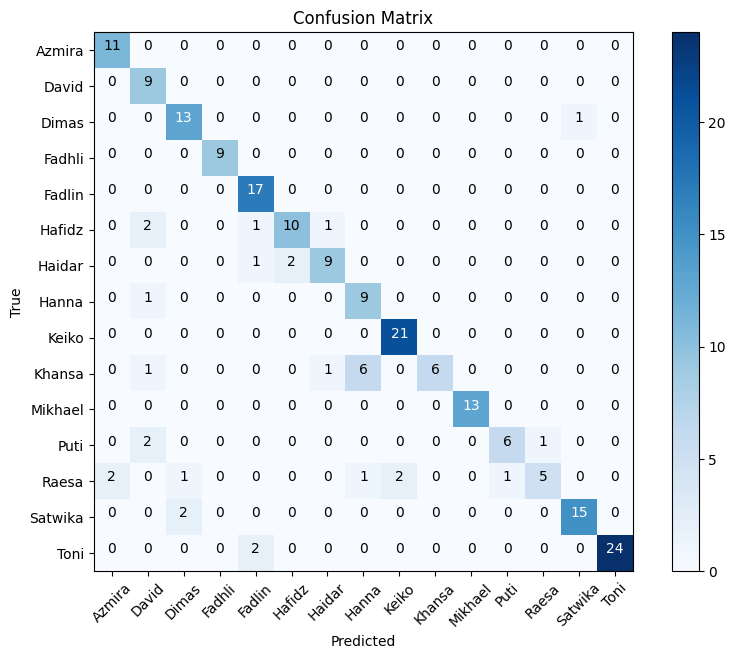

In [26]:
model_50.plot_confusion_matrix(X_test, y_test)

In [27]:
model_50.save_weights("./My_Model_50/08_Ishmael_Rotate.pkl")